# Verify a Presentation

## Before running this notebook you should have a mobile wallet contained the credential you issued yourself in Part 3. If not run through [Part 2](http://localhost:8888/lab/tree/Part%202%20-%20Writing%20a%20Public%20DID%20to%20the%20Sovrin%20StagingNet.ipynb) and [Part 3](http://localhost:8888/lab/tree/Part%203%20-%20Issue%20Credential.ipynb) of this tutorial.

If unfamiliar with the present-proof protocol it is worth reading through the [aries-rfs](https://github.com/hyperledger/aries-rfcs/tree/master/features/0037-present-proof)


## Note that you do not need to write a public DID to the ledger as a verifier.

## 1. Instatiate Controller for Verifiers's Agent

In [1]:
%autoawait
import time
import asyncio
from termcolor import colored,cprint

from aries_basic_controller.aries_controller import AriesAgentController

WEBHOOK_HOST = "0.0.0.0"
WEBHOOK_PORT = 8052
WEBHOOK_BASE = ""
ADMIN_URL = "http://verifier-agent:8051"

# Based on the aca-py agent you wish to control
agent_controller = AriesAgentController(admin_url=ADMIN_URL)


IPython autoawait is `on`, and set to use `asyncio`


In [2]:
agent_controller.init_webhook_server(webhook_host=WEBHOOK_HOST,
                                     webhook_port=WEBHOOK_PORT,
                                     webhook_base=WEBHOOK_BASE)

## 2. Register Listeners

The handler should get called every time the controller receives a webhook with the topic present_proof, printing out the payload. The agent calls to this webhook every time it receives a present proof protocol message from another agent. 


In [3]:
loop = asyncio.get_event_loop()
loop.create_task(agent_controller.listen_webhooks())

def connections_handler(payload):
    global STATE
    connection_id = payload["connection_id"]
    print("Connection message", payload, connection_id)
    STATE = payload['state']
    if STATE == 'active':
#         print('Connection {0} changed state to active'.format(connection_id))
        print(colored("Connection {0} changed state to active".format(connection_id), "red", attrs=["bold"]))


connection_listener = {
    "handler": connections_handler,
    "topic": "connections"
}

def proof_handler(payload):
    print("Handle present proof")
    print(payload)

proof_listener = {
    "topic": "present_proof",
    "handler": proof_handler
}

agent_controller.register_listeners([connection_listener,proof_listener], defaults=True)



Subscribing too: connections
Subscribing too: present_proof


## 3. Make a connection with the Mobile SSI Wallet you used in [Part 2](http://localhost:8888/lab/tree/Part%202%20-%20Writing%20a%20Public%20DID%20to%20the%20Sovrin%20StagingNet.ipynb)

**You should have a credential stored in here from the previous notebook!**

Please download a mobile SSI wallet such as [Connect.me](https://connect.me/), [Trinsic](https://trinsic.id/trinsic-wallet/) or any other Aries compatible wallet.

## 4. Create a connection invitation to scan with the Mobile SSI Wallet

## 4a. Check for any existing connections

In [13]:
removed = await agent_controller.connections.remove_connection('336829c7-f19b-4365-8ea9-ace2ccb5ee0c')
print(removed)

{}


In [14]:
# Check for existing connections
connection = await agent_controller.connections.get_connections()
print("EXISTING CONNECTIONS")
for key, value in connection.items():
    for item in value:
        print('ConnectionID:', item['connection_id'], 'Status:',item['state'])

EXISTING CONNECTIONS


## 4b. Create an Invitation

In [15]:
# Create Invitation
invite = await agent_controller.connections.create_invitation()
connection_id = invite["connection_id"]
print("Connection ID", connection_id)
print("Invitation")
print(invite['invitation_url'])
inviteURL = invite['invitation_url']

Connection message {'invitation_key': '9cVZSJcsb47QLfE3t6jQgXz3fVd8Khg4x2p89Uz8rRdG', 'state': 'invitation', 'routing_state': 'none', 'invitation_mode': 'once', 'their_role': 'invitee', 'accept': 'auto', 'rfc23_state': 'invitation-sent', 'connection_id': '0253add3-ef24-4f6f-9cbe-766e3ac33805', 'updated_at': '2023-01-01 13:23:46.351165Z', 'created_at': '2023-01-01 13:23:46.351165Z'} 0253add3-ef24-4f6f-9cbe-766e3ac33805
Connection ID 0253add3-ef24-4f6f-9cbe-766e3ac33805
Invitation
http://ec41-122-116-60-181.ngrok.io?c_i=eyJAdHlwZSI6ICJkaWQ6c292OkJ6Q2JzTlloTXJqSGlxWkRUVUFTSGc7c3BlYy9jb25uZWN0aW9ucy8xLjAvaW52aXRhdGlvbiIsICJAaWQiOiAiYzE2N2U3ZTQtNjhkYi00MDQ0LThiNTAtOThlMDc0ZDU0ZWFiIiwgImxhYmVsIjogIlZFUklGSUVSIiwgInJlY2lwaWVudEtleXMiOiBbIjljVlpTSmNzYjQ3UUxmRTN0NmpRZ1h6M2ZWZDhLaGc0eDJwODlVejhyUmRHIl0sICJzZXJ2aWNlRW5kcG9pbnQiOiAiaHR0cDovL2VjNDEtMTIyLTExNi02MC0xODEubmdyb2suaW8ifQ==


## 4c. Generate QR Code to be scanned with Mobile SSI Wallet

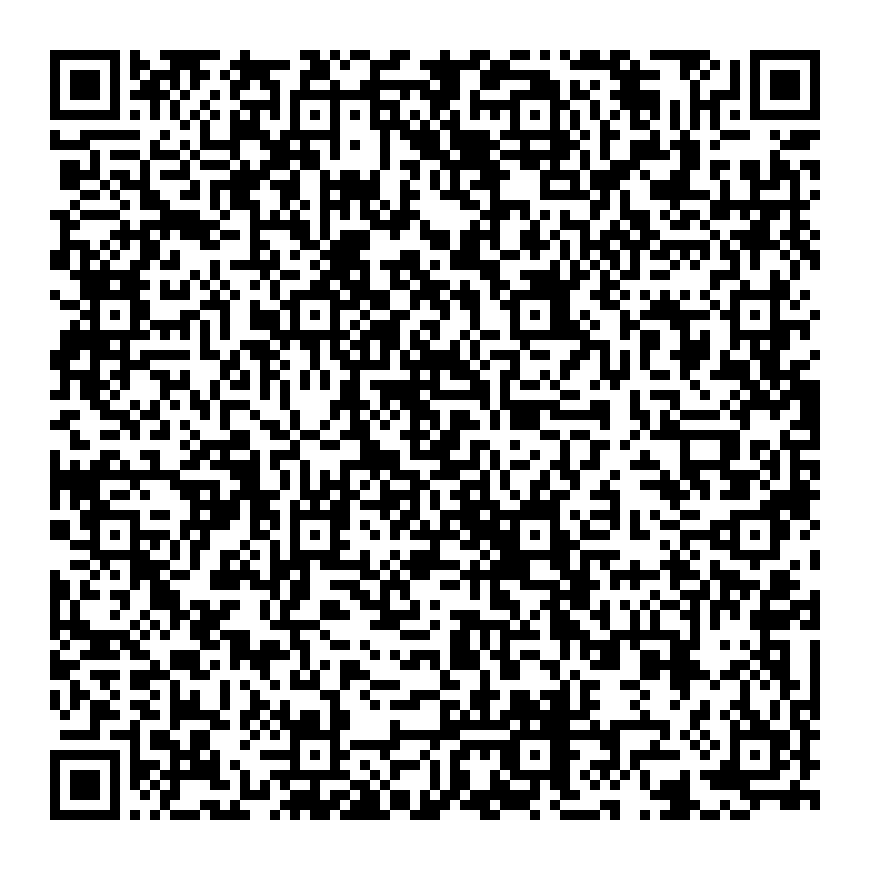

Connection message {'invitation_key': '9cVZSJcsb47QLfE3t6jQgXz3fVd8Khg4x2p89Uz8rRdG', 'state': 'request', 'routing_state': 'none', 'invitation_mode': 'once', 'their_role': 'invitee', 'accept': 'auto', 'their_label': 'Chloebaba', 'rfc23_state': 'request-received', 'connection_id': '0253add3-ef24-4f6f-9cbe-766e3ac33805', 'updated_at': '2023-01-01 13:23:55.008045Z', 'their_did': 'Lwa2ouGuDXRGni9UeUCLu', 'created_at': '2023-01-01 13:23:46.351165Z'} 0253add3-ef24-4f6f-9cbe-766e3ac33805
Connection message {'invitation_key': '9cVZSJcsb47QLfE3t6jQgXz3fVd8Khg4x2p89Uz8rRdG', 'state': 'response', 'routing_state': 'none', 'invitation_mode': 'once', 'my_did': 'Vi6SfptnLKYXpx8dnEA7rK', 'their_role': 'invitee', 'accept': 'auto', 'their_label': 'Chloebaba', 'rfc23_state': 'response-sent', 'connection_id': '0253add3-ef24-4f6f-9cbe-766e3ac33805', 'updated_at': '2023-01-01 13:23:55.056318Z', 'their_did': 'Lwa2ouGuDXRGni9UeUCLu', 'created_at': '2023-01-01 13:23:46.351165Z'} 0253add3-ef24-4f6f-9cbe-766e3ac

In [16]:
import qrcode
# Link for connection invitation
input_data = inviteURL
# Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')
img.save('verifier_agent_invite_QRcode.png')

from IPython.display import Image
Image(width=400, filename='./verifier_agent_invite_QRcode.png')

## 4d. Check if established connection is in active state

In [17]:
import time

# print('Current state for ConnectionId {} is {}'.format(connection_id,STATE))
print(colored("Current state for ConnectionId {} is {}".format(connection_id,STATE), "magenta", attrs=["bold"]))
while STATE != 'active':
#     print('ConnectionId {0} is not in active state yet'.format(connection_id))
    print(colored("ConnectionId {0} is not in active state yet".format(connection_id), "yellow", attrs=["bold"]))
    trust_ping = await agent_controller.messaging.trust_ping(connection_id,'hello!')
#     print('Trust ping send to ConnectionId {0} to activate connection'.format(trust_ping))
    print(colored("Trust ping send to ConnectionId {0} to activate connection".format(trust_ping), "blue", attrs=["bold"]))
    time.sleep(5)
    
# print('ConnectionId: {0} is now active. Continue with notebook'.format(connection_id))
print(colored("ConnectionId: {0} is now active. Continue with notebook".format(connection_id), "green", attrs=["bold"]))


Current state for ConnectionId 0253add3-ef24-4f6f-9cbe-766e3ac33805 is active
ConnectionId: 0253add3-ef24-4f6f-9cbe-766e3ac33805 is now active. Continue with notebook


## 5. Send Proof Request to Identity Holder Mobile Wallet

## 5a. Generate Proof Request

The verifier will request a proof from the identity holder for the following attributes:

    fullname"
    "skill"
    "country" - self-attested
    "age" - as a predicate range proof to determine if the identity holder is older than 21


Note how the verifier has restricted the proof request to only include credentials issued against a specific `schema_id`. 

In our case `schema_id` = EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1

If you ledgered your own schema in [Part 2](http://127.0.0.1:8888/notebooks/Part%203%20-%20Issuer.ipynb) and didn't use the pre-ledgered schema then please copy the new schema_id into the `schemaid` variable in the cell below.

TODO: Add information around predicates

In [24]:
# schema_id = 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'
schema_id= '8o3GCSueozeXxMNR1LzewV:2:Test Schema Chloebaba:0.0.1'

print("Request proof of Credentials range from Identity Holder")
#Set some variables

revocation = False
SELF_ATTESTED = True
exchange_tracing = False

#Enable this to ask for attributes to identity a user
#TODO - change restriction to schemaId or credentialId

req_attrs = [
    {"name": "author", "restrictions": [{"schema_id": schema_id}]},
    {"name": "name", "restrictions": [{"schema_id": schema_id}]},
    {"name": "is_original", "restrictions": [{"schema_id": schema_id}]},
]

if revocation:
    req_attrs.append(
        {
            "name": "time",
            "restrictions": [{"schema_id": schema_id}],
            "non_revoked": {"to": int(time.time() - 1)},
        },
    )

if SELF_ATTESTED:
    # test self-attested claims
    req_attrs.append({"name": "type"},)

#Set predicates for Zero Knowledge Proofs
req_preds = [
    # test zero-knowledge proofs
    {
        "name": "is_original",
        "p_type": ">=",
        "p_value": 1,
        "restrictions": [{"schema_id": schema_id}],
    }
]

indy_proof_request = {
    "name": "Proof of Originality",
    "version": "2.0",
    "requested_attributes": {
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
    },
    "requested_predicates": {
        f"0_{req_pred['name']}_GE_uuid":
        req_pred for req_pred in req_preds
    },
}

if revocation:
    indy_proof_request["non_revoked"] = {"to": int(time.time())}

#proof_request = indy_proof_request
exchange_tracing_id = exchange_tracing
proof_request_web_request = {
    "connection_id": connection_id,
    "proof_request": indy_proof_request,
    "trace": exchange_tracing,
}

Request proof of Credentials range from Identity Holder


### 5b. Send the proof request to Identity Holder

Identity Holder is identified through the connection_id

In [25]:
response = await agent_controller.proofs.send_request(proof_request_web_request)
print(response)
presentation_exchange_id = response['presentation_exchange_id']
print("\n")
print(presentation_exchange_id)


{'state': 'request_sent', 'thread_id': '7698e7b3-8222-46a9-99a0-3fb9a1821b52', 'auto_present': False, 'presentation_exchange_id': '6b05d3ef-19a7-43e4-a81d-8352ca49195b', 'role': 'verifier', 'connection_id': '0253add3-ef24-4f6f-9cbe-766e3ac33805', 'presentation_request': {'name': 'Proof of Originality', 'version': '2.0', 'requested_attributes': {'0_author_uuid': {'name': 'author', 'restrictions': [{'schema_id': '8o3GCSueozeXxMNR1LzewV:2:Test Schema Chloebaba:0.0.1'}]}, '0_name_uuid': {'name': 'name', 'restrictions': [{'schema_id': '8o3GCSueozeXxMNR1LzewV:2:Test Schema Chloebaba:0.0.1'}]}, '0_is_original_uuid': {'name': 'is_original', 'restrictions': [{'schema_id': '8o3GCSueozeXxMNR1LzewV:2:Test Schema Chloebaba:0.0.1'}]}, '0_type_uuid': {'name': 'type'}}, 'requested_predicates': {'0_is_original_GE_uuid': {'name': 'is_original', 'p_type': '>=', 'p_value': 1, 'restrictions': [{'schema_id': '8o3GCSueozeXxMNR1LzewV:2:Test Schema Chloebaba:0.0.1'}]}}, 'nonce': '74488300146216360316854'}, 'pr

## 6. Verify Proof Presentation

This is checking the signatures on the credentials presented against the credential schema and definition id stored and resolvable on the ledger. It is a bit of a big complicated object, so we show the common pattern for breaking it down, checking it's verified and accessing the data that has been presented.

In [39]:
verify = await agent_controller.proofs.verify_presentation(presentation_exchange_id)
print(verify)

ClientResponseError: 400, message='Presentation exchange 33c162b3-2f29-4a8f-ad73-356d08347c9b in request_sent state (must be presentation_received)', url=URL('http://verifier-agent:8051/present-proof/records/33c162b3-2f29-4a8f-ad73-356d08347c9b/verify-presentation')

Error during POST /present-proof/records/33c162b3-2f29-4a8f-ad73-356d08347c9b/verify-presentation: 400, message='Presentation exchange 33c162b3-2f29-4a8f-ad73-356d08347c9b in request_sent state (must be presentation_received)', url=URL('http://verifier-agent:8051/present-proof/records/33c162b3-2f29-4a8f-ad73-356d08347c9b/verify-presentation')


### Verifying the State

Once verified through the agent framework api, the state should be 'verified', otherwise the presentation is invalid.

In [25]:
print(verify['state'])
print(verify['state'] == 'verified')

NameError: name 'verify' is not defined

### Accessing the Revealed Attributes

In [14]:
# print(verify['presentation'])
# print(verify['presentation']['requested_proof'])

for (name, val) in verify['presentation']['requested_proof']['revealed_attrs'].items():
    ## This is the actual data that you want. It's a little hidden
    print(val['raw'])


PyDentity SSI Ninja
Chloe Baba


### Accessing self-attested attributes

In [15]:
for (name, val) in verify['presentation']['requested_proof']['self_attested_attrs'].items():
    print(name)
    ## Slightly different for self attested attrs
    print(val)

0_country_uuid
Taiwan


## End of Tutorial

Be sure to terminate the controller so you can run another tutorial.

In [56]:
response = await agent_controller.terminate()
print(response)

None


## Well done on completing the PyDentity SSI training series!